# **THYROID CANCER CLASSIFICATION**

In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 36.6 MB/s eta 0:00:00


In [ ]:
pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sweetviz
import joblib
import pickle
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from scipy.stats import randint


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing the dataset
data = pd.read_csv("/content/drive/MyDrive/MY PROJECTS/THYROID CLASSIFICATION/Thyroid_Diff.csv")
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
# Basic Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
# Basic statistics
data.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [ ]:
# Data types
data.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

In [ ]:
# Shape of dataset
data.shape

(383, 17)

In [ ]:
# Checking any null values present or not
data.isnull().sum()                      # No Null Values present

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [ ]:
# Checking Duplicates present or not
data.duplicated().sum()             # Duplicates present

19

In [ ]:
# Removing the duplicates
data = data.drop_duplicates()

In [ ]:
# AutoEDA
my_report = sweetviz.analyze([data,'data'])
my_report.show_html("Thyroid_cancer_eda_report")

                                             |          | [  0%]   00:00 -> (? left)

Report Thyroid_cancer_eda_report was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Age    Axes(0.125,0.11;0.775x0.77)
dtype: object

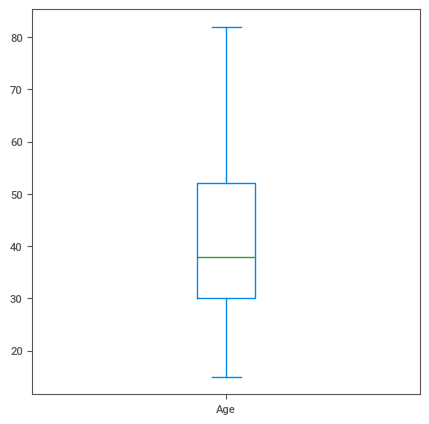

In [ ]:
# Checking whether outlier present or not
# Box plot to visualize outlier
data.plot(kind = 'box', subplots = True, sharey = False, figsize= (5,5))

In [ ]:
# Separate the features and target variables
target = data['Recurred']
features = data.iloc[ : , :16]

In [ ]:
target.head()

0    No
1    No
2    No
3    No
4    No
Name: Recurred, dtype: object

In [ ]:
features.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent


In [ ]:
# Separate categorical and numerical features
categorical = features.select_dtypes(include = ['object'])
categorical.head()

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
2,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
3,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
4,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent


In [ ]:
numeric = data.select_dtypes(exclude = ['object'])
numeric.head()

,Age
0,27
1,34
2,30
3,62
4,62


In [ ]:
# Label Encoding for categorical columns
labelencoder = LabelEncoder()

In [ ]:
# Initialize a dictionary to store label encoders for each column
label_encoders = {}

# Convert categorical values in all columns to numerical
for col in categorical.columns:
    if categorical[col].dtype == 'object':
        label_encoder = LabelEncoder()
        categorical[col] = label_encoder.fit_transform(categorical[col])
        # Save the label encoder to the dictionary
        label_encoders[col] = label_encoder

# Provide the file path where you want to save the label encoder files
file_path = "/content/drive/MyDrive/MY PROJECTS/THYROID CLASSIFICATION/label_encoder"

# Create the directory if it doesn't exist
os.makedirs(file_path, exist_ok=True)

# Save each label encoder to a separate file in the specified directory
for col, label_encoder in label_encoders.items():
    joblib.dump(label_encoder, os.path.join(file_path, f'{col}_label_encoder.pkl'))


In [ ]:
# convert categorical values in all columns to numerical

for col in categorical.columns:
  if categorical[col].dtype == 'object':
    categorical[col] = labelencoder.fit_transform(categorical[col])

In [ ]:
categorical.head()

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2
1,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1
2,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
3,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
4,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1


# **LOGISTICS REGRESSION ALGORITHM**

In [ ]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(categorical, target,  test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(291, 15)
(73, 15)
(291,)
(73,)


In [ ]:
# Initializing the logistic Regression model
log_reg = LogisticRegression()

In [ ]:
log_reg = log_reg.fit(x_train, y_train)
log_reg

LogisticRegression()

In [ ]:
# Save the code
joblib.dump(log_reg, '/content/drive/MyDrive/MY PROJECTS/THYROID CLASSIFICATION/log_reg.pkl')

['/content/drive/MyDrive/MY PROJECTS/THYROID CLASSIFICATION/log_reg.pkl']

In [ ]:
# Train prediction
train_predict = log_reg.predict(x_train)

In [ ]:
# Train Accuracy
log_train_accuracy = accuracy_score(train_predict, y_train)
print(log_train_accuracy)

0.9106529209621993


In [ ]:
# Test prediction
test_prediction = log_reg.predict(x_test)

In [ ]:
# Test Accuracy
log_test_accuracy = accuracy_score(test_prediction, y_test)
print(log_test_accuracy)

0.8767123287671232


#  USING RANDOMIZED SEARCH CV FOR FINDING BEST PARAMETERS

In [ ]:
# Define hyperparameter grid
param_grid = {
    'C': uniform(loc=0, scale=4),  # Regularization parameter C
    'penalty': ['l1', 'l2'],      # Penalty term (L1 or L2 regularization)
    'solver': ['liblinear', 'saga', 'lbfgs']
}

In [ ]:
# Initialize RandomizedSearchCV
random_search_log = RandomizedSearchCV(estimator = log_reg, param_distributions = param_grid, n_iter = 100, cv = 5, random_state = 42)

In [ ]:
random_search_log = random_search_log.fit(x_train, y_train)
random_search_log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bb7ba86fbe0>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga',
                                                   'lbfgs']},
                   random_state=42)

In [ ]:
# Get the best estimator
best_logreg = random_search_log.best_estimator_
best_logreg

LogisticRegression(C=0.1866626528544617)

In [ ]:
# Train Prediction
train_pre = best_logreg.predict(x_train)

In [ ]:
# Train Accuracy
log_best_train = accuracy_score(train_pre, y_train)
print(log_best_train)
print(classification_report(train_pre, y_train))
print(confusion_matrix(train_pre, y_train))

0.9209621993127147
              precision    recall  f1-score   support

          No       0.97      0.93      0.95       214
         Yes       0.81      0.91      0.86        77

    accuracy                           0.92       291
   macro avg       0.89      0.92      0.90       291
weighted avg       0.93      0.92      0.92       291

[[198  16]
 [  7  70]]


In [ ]:
# Testing the best estimator on test data
test_pre = best_logreg.predict(x_test)

In [ ]:
# Train accuracy
log_best_test = accuracy_score(test_pre, y_test)
print(log_best_test)
print(classification_report(test_pre, y_test))
print(confusion_matrix(test_pre, y_test))

0.8904109589041096
              precision    recall  f1-score   support

          No       0.90      0.94      0.92        49
         Yes       0.86      0.79      0.83        24

    accuracy                           0.89        73
   macro avg       0.88      0.87      0.87        73
weighted avg       0.89      0.89      0.89        73

[[46  3]
 [ 5 19]]


# **ARTIFICIAL NEURAL NETWORK(ANN) MODEL FOR CLASSIFICATION**

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

In [ ]:
y_train_bi = labelencoder.fit_transform(y_train)
y_test_bi = labelencoder.fit_transform(y_test)

In [ ]:
# Initialize the model
model = Sequential()

# Add Hidden Layer
model.add(Dense(units = 32, activation = 'relu', input_shape = (x_train_scale.shape[1],)))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))

# Add a output layer
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train the model
model.fit(x_train_scale, y_train_bi, epochs = 100, batch_size = 32, validation_split= 0.1)

Epoch 1/100
9/9 [==============================] - 1s 29ms/step - loss: 0.6298 - accuracy: 0.7625 - val_loss: 0.5402 - val_accuracy: 0.9000
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5210 - accuracy: 0.8889 - val_loss: 0.4434 - val_accuracy: 0.9333
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4315 - accuracy: 0.9119 - val_loss: 0.3543 - val_accuracy: 0.9333
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3477 - accuracy: 0.9195 - val_loss: 0.2746 - val_accuracy: 0.9333
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2817 - accuracy: 0.9234 - val_loss: 0.2204 - val_accuracy: 0.9333
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2437 - accuracy: 0.9272 - val_loss: 0.1896 - val_accuracy: 0.9333
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2205 - accuracy: 0.9272 - val_loss: 0.1828 - val_accuracy: 0.9333
Epoch 8/100
9/9 [=========

In [ ]:
# evaluate on train data

train_loss, ann_train_acc = model.evaluate(x_train_scale, y_train_bi)
print('Train Loss:', train_loss)
print('Train Accurcay:', ann_train_acc)

10/10 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9931
Train Loss: 0.028801269829273224
Train Accurcay: 0.993127167224884


In [ ]:
# Evaluate on test data

test_loss, ann_test_acc = model.evaluate(x_test_scale, y_test_bi)
print("Test Loss:", test_loss)
print("Test Accuracy:", ann_test_acc)

3/3 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9863
Test Loss: 0.17627975344657898
Test Accuracy: 0.9863013625144958


# **Decision Tree**

In [ ]:
x = categorical
x.head()

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2
1,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1
2,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
3,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
4,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1


In [ ]:
y = target
y.head()

0    No
1    No
2    No
3    No
4    No
Name: Recurred, dtype: object

In [ ]:
# Train Test split for Decision Tree
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [ ]:
# Initialize Decision tree
decision_tree = DecisionTreeClassifier()

In [ ]:
decision_tree = decision_tree.fit(x_train, y_train)
decision_tree

DecisionTreeClassifier()

In [ ]:
joblib.dump(decision_tree, '/content/drive/MyDrive/MY PROJECTS/THYROID CLASSIFICATION/decision_tree.pkl')

['/content/drive/MyDrive/MY PROJECTS/THYROID CLASSIFICATION/decision_tree.pkl']

In [ ]:
# Prediction on training data
train_predict = decision_tree.predict(x_train)

In [ ]:
# Train Accuracy
dt_train_acc = accuracy_score(train_predict, y_train)

print(dt_train_acc)
print(classification_report(train_predict, y_train))
print(confusion_matrix(train_predict, y_train))

1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       197
         Yes       1.00      1.00      1.00        94

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291

[[197   0]
 [  0  94]]


In [ ]:
# Prediction on test data

test_predict = decision_tree.predict(x_test)

In [ ]:
# Test Accuracy
dt_test_acc = accuracy_score(test_predict, y_test)

print(dt_test_acc)
print(classification_report(test_predict, y_test))
print(confusion_matrix(test_predict, y_test))

0.9315068493150684
              precision    recall  f1-score   support

          No       0.97      0.95      0.96        60
         Yes       0.79      0.85      0.81        13

    accuracy                           0.93        73
   macro avg       0.88      0.90      0.89        73
weighted avg       0.93      0.93      0.93        73

[[57  3]
 [ 2 11]]


# **USE RANDOMIZED SEARCH CV FOR FINDING BEST PARAMETERS**

In [ ]:
# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': randint(1, 20),       # Maximum depth of the tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10)    # Minimum number of samples required at each leaf node
}

In [ ]:
# Initialize RandomizedSearchCV
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

In [ ]:
# Fit RandomizedSearchCV to the training data
random_search_dt = random_search_dt.fit(x_train, y_train)

In [ ]:
# Get the best estimator
best_decision_tree = random_search_dt.best_estimator_

In [ ]:
best_decision_tree

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       min_samples_split=3)

In [ ]:
# Evaluate the train data using best decision tree
y_pred_train =  best_decision_tree.predict(x_train)

In [ ]:
# Train Accuracy
dt_best_train = accuracy_score(y_pred_train, y_train)

print(dt_best_train)
print(classification_report(y_pred_train, y_train))
print(confusion_matrix(y_pred_train, y_train))

0.9656357388316151
              precision    recall  f1-score   support

          No       0.98      0.97      0.97       201
         Yes       0.93      0.97      0.95        90

    accuracy                           0.97       291
   macro avg       0.96      0.97      0.96       291
weighted avg       0.97      0.97      0.97       291

[[194   7]
 [  3  87]]


In [ ]:
# Predict on the testing data using the best estimator
y_pred = best_decision_tree.predict(x_test)

In [ ]:
# Evaluate the model on test data
dt_best_test = accuracy_score(y_test, y_pred)

print(dt_best_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Best Hyperparameters:", random_search_dt.best_params_)

0.958904109589041
[[59  0]
 [ 3 11]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.98        59
         Yes       1.00      0.79      0.88        14

    accuracy                           0.96        73
   macro avg       0.98      0.89      0.93        73
weighted avg       0.96      0.96      0.96        73

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 3}


# **RANDOM FOREST CLASSIFIER**

In [ ]:
random_forest = RandomForestClassifier()

In [ ]:
random_forest = random_forest.fit(x_train, y_train)
random_forest

RandomForestClassifier()

In [ ]:
joblib.dump(random_forest, '/content/drive/MyDrive/MY PROJECTS/THYROID CLASSIFICATION/random_forest.pkl')

['/content/drive/MyDrive/MY PROJECTS/THYROID CLASSIFICATION/random_forest.pkl']

In [ ]:
train_predict = random_forest.predict(x_train)

In [ ]:
# Train accuracy
rf_train_acc = accuracy_score(train_predict, y_train)

print(rf_train_acc)
print(classification_report(train_predict, y_train))
print(confusion_matrix(train_predict, y_train))

1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       197
         Yes       1.00      1.00      1.00        94

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291

[[197   0]
 [  0  94]]


In [ ]:
# Evaluate on test data
test_predict = random_forest.predict(x_test)

In [ ]:
# Test accuracy
rf_test_acc = accuracy_score(test_predict, y_test)

print(rf_test_acc)
print(classification_report(test_predict, y_test))
print(confusion_matrix(test_predict, y_test))

0.958904109589041
              precision    recall  f1-score   support

          No       1.00      0.95      0.98        62
         Yes       0.79      1.00      0.88        11

    accuracy                           0.96        73
   macro avg       0.89      0.98      0.93        73
weighted avg       0.97      0.96      0.96        73

[[59  3]
 [ 0 11]]


# Use RandomizedSearchCV for finding best parameters

In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': randint(10, 100),  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': randint(1, 20),       # Maximum depth of the trees
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10)    # Minimum number of samples required at each leaf node
}

In [ ]:
random_search_rf = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid, n_iter = 100, cv = 5, random_state = 42 )

In [ ]:
random_search_rf = random_search_rf.fit(x_train, y_train)
random_search_rf

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb7b1e06080>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb7b1e07310>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb7b1e06860>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb7b1e06140>},
                   random_state=42)

In [ ]:
best_rf_parameter = random_search_rf.best_estimator_
best_rf_parameter

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=95)

In [ ]:
train_predict = best_rf_parameter.predict(x_train)

In [ ]:
# Train Accuracy
rf_best_train = accuracy_score(train_predict, y_train)

print(rf_best_train)
print(classification_report(train_predict, y_train))
print(confusion_matrix(train_predict, y_train))

0.9690721649484536
              precision    recall  f1-score   support

          No       0.99      0.96      0.98       204
         Yes       0.91      0.99      0.95        87

    accuracy                           0.97       291
   macro avg       0.95      0.97      0.96       291
weighted avg       0.97      0.97      0.97       291

[[196   8]
 [  1  86]]


In [ ]:
# Evaluating on test data
test_predict = best_rf_parameter.predict(x_test)

In [ ]:
rf_best_test = accuracy_score(test_predict, y_test)

print(rf_best_test)
print(classification_report(test_predict, y_test))
print(confusion_matrix(test_predict, y_test))

0.9315068493150684
              precision    recall  f1-score   support

          No       0.98      0.94      0.96        62
         Yes       0.71      0.91      0.80        11

    accuracy                           0.93        73
   macro avg       0.85      0.92      0.88        73
weighted avg       0.94      0.93      0.93        73

[[58  4]
 [ 1 10]]


# **ENSEMBLE TECHNIQUES**

In [ ]:
# Creating a voting classifier using soft voting
voting_classifier = VotingClassifier(estimators = [('lr', log_reg),('rf', random_forest),('dt', decision_tree)], voting = 'soft')

In [ ]:
voting_classifier = voting_classifier.fit(x_train, y_train)
voting_classifier

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [ ]:
# Save the Ensemble mode

joblib.dump(voting_classifier,'/content/drive/MyDrive/MY PROJECTS/THYROID CLASSIFICATION/ensemble_model.pkl')

['ensemble_model.pkl']

In [ ]:
# Prediction on train data
train_pred_en = voting_classifier.predict(x_train)

In [ ]:
train_ensemble = accuracy_score(train_pred_en, y_train)

print(train_ensemble)
print(classification_report(train_pred_en, y_train))
print(confusion_matrix(train_pred_en, y_train))

1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       197
         Yes       1.00      1.00      1.00        94

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291

[[197   0]
 [  0  94]]


In [ ]:
# Prediction on test data
test_pred_en = voting_classifier.predict(x_test)

In [ ]:
test_ensemble = accuracy_score(test_pred_en, y_test)

print(test_ensemble)
print(classification_report(test_pred_en, y_test))
print(confusion_matrix(test_pred_en, y_test))

0.9315068493150684
              precision    recall  f1-score   support

          No       0.97      0.95      0.96        60
         Yes       0.79      0.85      0.81        13

    accuracy                           0.93        73
   macro avg       0.88      0.90      0.89        73
weighted avg       0.93      0.93      0.93        73

[[57  3]
 [ 2 11]]


# **Using Randomizedsearch CV for best parameters for ENSEMBLE METHOD**

In [ ]:
# Define hyperparameter grid for each individual model
logistic_regression_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

random_forest_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize RandomizedSearchCV for each individual model
logistic_regression_random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=logistic_regression_params, n_iter=10, cv=5, random_state=42)
random_forest_random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=random_forest_params, n_iter=10, cv=5, random_state=42)
decision_tree_random_search = RandomizedSearchCV(estimator=decision_tree, param_distributions=decision_tree_params, n_iter=10, cv=5, random_state=42)

In [ ]:
# Train RandomizedSearchCV for each individual model
logistic_regression_random_search.fit(x_train, y_train)
random_forest_random_search.fit(x_train, y_train)
decision_tree_random_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42)

In [ ]:
# Get the best estimators for each individual model
best_logistic_regression = logistic_regression_random_search.best_estimator_
best_random_forest = random_forest_random_search.best_estimator_
best_decision_tree = decision_tree_random_search.best_estimator_

In [ ]:
best_logistic_regression


LogisticRegression(C=0.1)

In [ ]:
best_random_forest

RandomForestClassifier(min_samples_leaf=2, n_estimators=10)

In [ ]:
best_decision_tree

DecisionTreeClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=10)

In [ ]:
# Create a voting classifier with soft voting using the best estimators
voting_classifier_best = VotingClassifier(
    estimators=[('lr', best_logistic_regression), ('rf', best_random_forest), ('dt', best_decision_tree)],
    voting='soft'  # Use soft voting for probabilities averaging
)

In [ ]:
# Train the ensemble model
voting_classifier_best = voting_classifier_best.fit(x_train, y_train)

# Save the ensemble model
joblib.dump(voting_classifier_best, '/content/drive/MyDrive/MY PROJECTS/THYROID CLASSIFICATION/ensemble_model_best_estimators.pkl')


['/content/drive/MyDrive/MY PROJECTS/THYROID CLASSIFICATION/ensemble_model_best_estimators.pkl']

In [ ]:
train_pred_en_best = voting_classifier_best.predict(x_train)

In [ ]:
# Accuracy of Train data
train_en_best = accuracy_score(train_pred_en_best, y_train)

print(train_en_best)
print(classification_report(train_pred_en_best, y_train))
print(confusion_matrix(train_pred_en_best, y_train))

0.9690721649484536
              precision    recall  f1-score   support

          No       0.98      0.97      0.98       200
         Yes       0.94      0.97      0.95        91

    accuracy                           0.97       291
   macro avg       0.96      0.97      0.96       291
weighted avg       0.97      0.97      0.97       291

[[194   6]
 [  3  88]]


In [ ]:
test_pred_en_best = voting_classifier_best.predict(x_test)

In [ ]:
#  Accuracy of Test data
test_en_best = accuracy_score(test_pred_en_best, y_test)

print(test_en_best)
print(classification_report(test_pred_en_best, y_test))
print(confusion_matrix(test_pred_en_best, y_test))

0.958904109589041
              precision    recall  f1-score   support

          No       1.00      0.95      0.98        62
         Yes       0.79      1.00      0.88        11

    accuracy                           0.96        73
   macro avg       0.89      0.98      0.93        73
weighted avg       0.97      0.96      0.96        73

[[59  3]
 [ 0 11]]


# **Train and Test accuracies comparison**

In [ ]:
train_accuracy = {'Logistic_Regression': log_train_accuracy,
                  'Logistics_Regression_Best_Randomized':log_best_train,
                  'ANN' :ann_train_acc,
                  'Decision_Tree':dt_train_acc,
                  'Decision_Tree_Best_Randomized':dt_best_train ,
                  'Random_forest':rf_train_acc ,
                  'Random_forest_best_Randomized':rf_best_train,
                  'Ensemble_model' :train_ensemble,
                  'Ensemble_model_best_Randomized':train_en_best}

In [ ]:
train_accuracy = pd.DataFrame(train_accuracy, index = ['Train Accuracy'])
train_accuracy = train_accuracy.transpose().reset_index()

In [ ]:
test_accuracy = {'Logistic_Regression':log_test_accuracy,
                 'Logistics_Regression_Best_Randomized':log_best_test,
                 'ANN': ann_test_acc,
                 'Decision_Tree':dt_test_acc,
                 'Decision_Tree_Best_Randomized':dt_best_test,
                 'Random_forest':rf_test_acc,
                 'Random_forest_best_Randomized': rf_best_test,
                 'Ensemble_model' : test_ensemble,
                 'Ensemble_model_best_Randomized':test_en_best }

In [ ]:
test_accuracy = pd.DataFrame(test_accuracy, index = ['Test Accuracy'])
test_accuracy = test_accuracy.transpose().reset_index()

In [ ]:
accuracy_table = pd.merge(train_accuracy, test_accuracy, on = 'index')
final_table = accuracy_table.rename(columns = {'index' : 'Algorithms'})
final_table

,Algorithms,Train Accuracy,Test Accuracy
0,Logistic_Regression,0.910653,0.876712
1,Logistics_Regression_Best_Randomized,0.920962,0.890411
2,ANN,0.993127,0.986301
3,Decision_Tree,1.000000,0.931507
4,Decision_Tree_Best_Randomized,0.965636,0.958904
5,Random_forest,1.000000,0.958904
6,Random_forest_best_Randomized,0.969072,0.931507
7,Ensemble_model,1.000000,0.931507
8,Ensemble_model_best_Randomized,0.969072,0.958904
